In [1]:
import os
import json
import numpy as np
import pickle
import time
import pandas as pd
from monty.serialization import loadfn, dumpfn
from scipy.stats import skew, pearsonr, spearmanr
from glob import glob
from scipy.interpolate import interp1d
from datetime import datetime
from IPython.display import clear_output
import random
import itertools
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import sys
import seaborn as sns

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')
sys.path.append(src_dir)
from load_data import *


In [2]:
df_param = param_df()
df_diff = diff_df()
df_one = life_df()
df_rpt = rpt_df()
df_f_info = form_df()
df_electrode_info = electrode_df()

### Batch 2

2024-05-04 04:15:28 WARNING  NovonixDatapath could not load date-time in format '%Y-%m-%d %I:%M:%S %p'! Trying alternative...
2024-05-04 04:15:28 WARNING  No charge steps found in cycles [3]! Using highest capacity reading to determine convention.
2024-05-04 04:15:28 WARNING  No associated summary file for Novonix: 'None': No external summary loaded.


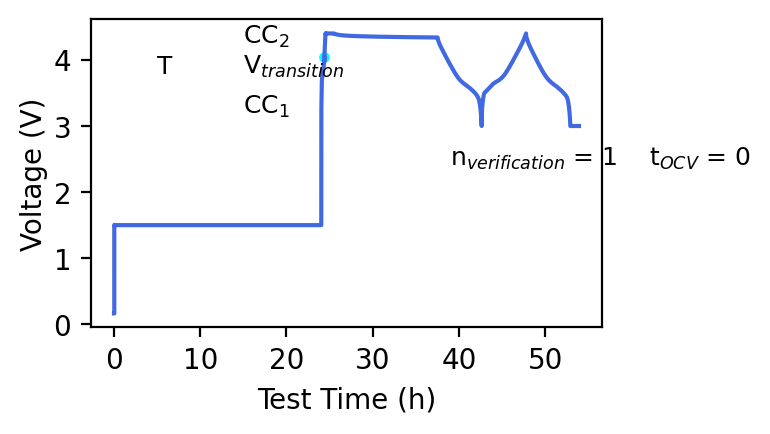

In [3]:
num_cols = 1
num_rows = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*3.3, num_rows*2), dpi = 200)
fig.subplots_adjust(hspace = .5, wspace=.4)

filepath = "folder/Nova_Formation-300.csv" # ---> change this to your own data path, otherwise this will not run 
df = structure.NovonixDatapath.from_file(filepath)
df_f = df.raw_data
chosen = df_f[(df_f.cycle_index == 1)&(df_f.step_index == 3)]
axs.scatter(chosen.test_time.iloc[-1], chosen.voltage.iloc[-1], color = 'cyan', s=8)



axs.plot(df_f.test_time, df_f.voltage, color = 'royalblue')
axs.set_xlabel('Test Time (h)')
axs.set_ylabel('Voltage (V)', labelpad = 2)
axs.text(15, 3.8, 'V$_{transition}$', fontsize = 9)
axs.text(15, 3.2, 'CC$_{1}$', fontsize = 9)
axs.text(15, 4.25, 'CC$_{2}$', fontsize = 9)
axs.text(39, 2.4, 'n$_{verification}$ = 1', fontsize = 9)
axs.text(5, 3.8, 'T', fontsize = 9)
axs.text(62, 2.4, 't$_{OCV}$ = 0', fontsize = 9)

# plt.savefig('Figs/batch_2_formation.pdf', transparent = True, bbox_inches='tight')

### Batch 1

2024-05-17 05:21:25 WARNING  NovonixDatapath could not load date-time in format '%Y-%m-%d %I:%M:%S %p'! Trying alternative...
2024-05-17 05:21:26 WARNING  No charge steps found in cycles [4]! Using highest capacity reading to determine convention.
2024-05-17 05:21:26 WARNING  No associated summary file for Novonix: 'None': No external summary loaded.


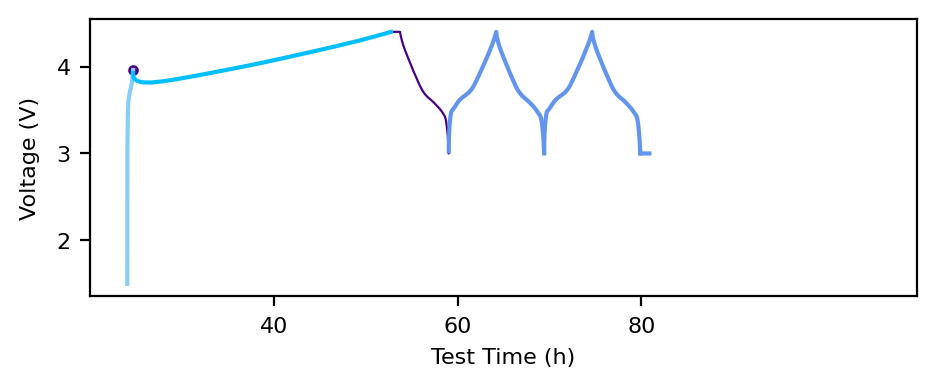

In [7]:
num_cols = 1
num_rows = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*8/3*2, num_rows*1.8), dpi = 200)
fig.subplots_adjust(hspace = .5, wspace=.4)

filepath = "folder/Nova_Formation-200.csv" # ---> change this to your own data path
df = structure.NovonixDatapath.from_file(filepath)
df_f = df.raw_data

veri_c = 'cornflowerblue'
cc1_c = 'lightskyblue'
cc2_c = 'deepskyblue'
cv_c = 'indigo'
chosen = df_f[(df_f.step_index > 3)]
axs.plot(chosen.test_time, chosen.voltage, color = 'indigo', linewidth = 0.8)
chosen = df_f[(df_f.cycle_index == 1)&(df_f.step_index == 3)]
axs.plot(chosen.test_time, chosen.voltage, color = cc1_c)
axs.scatter(chosen.test_time.iloc[-1], chosen.voltage.iloc[-1], color = cv_c, s=8)
chosen = df_f[(df_f.cycle_index == 1)&(df_f.step_index == 4)&(df_f.step_type_num == 7)]
axs.plot(chosen.test_time, chosen.voltage, color = cc2_c)

cycles = range(2, 7)
for cycle in cycles: 
    chosen = df_f[(df_f.cycle_index == cycle)]
    axs.plot(chosen.test_time, chosen.voltage, color = veri_c)
    
# axs.annotate('', xy=(30, 2.8), xytext=(85, 2.8), arrowprops=dict(arrowstyle="<->", color='salmon', lw = 1, mutation_scale = 5))




axs.set_xlabel('Test Time (h)', fontsize = 8)
axs.set_ylabel('Voltage (V)', fontsize = 8, labelpad = 6)
# axs.text(7, 2, 'CV$_{1}$', fontsize = 8, color = cv_c)
# axs.text(18.5, 3, 'CC$_{1}$', fontsize = 8, color = cc1_c)
# axs.text(8, 4., 'CC$_{2}$', fontsize = 8, color = cc2_c)
# axs.text(39, 2.4, 'n$_{verification}$', fontsize = 8, c = veri_c)
# axs.text(80, 2, 'T', fontsize = 8)
# axs.text(86, 2.5, 't$_{OCV}$', fontsize = 8)
axs.tick_params(axis='x', labelsize=8)
axs.tick_params(axis='y', labelsize=8)
axs.set_xlim(20, 110)
axs.set_xticks(range(40, 81, 20))

plt.savefig('Figs/batch_1_formation.svg', transparent = True, bbox_inches='tight')

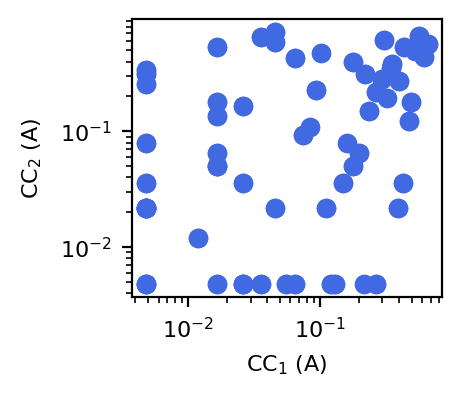

In [4]:
num_cols = 1
num_rows = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*1.8), dpi = 200)

param_df_chosen = df_param[df_param.seq_num.isin(batch_1)]
axs.scatter(param_df_chosen['formation_charge_current_1'], param_df_chosen['formation_charge_current_2'], color = 'royalblue')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("CC$_{1}$ (A)", fontsize = 8)
axs.set_ylabel("CC$_{2}$ (A)", labelpad = 6, fontsize = 8)
axs.tick_params(axis='x', labelsize=8)
axs.tick_params(axis='y', labelsize=8)

plt.savefig('Figs/Fig_1_b.svg', transparent = True, bbox_inches='tight')

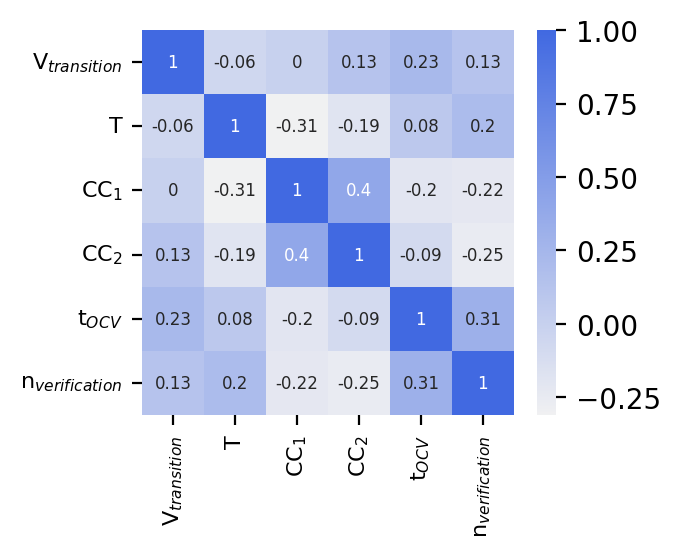

In [4]:
num_cols = 1
num_rows = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*2.5), dpi = 200)
fig.subplots_adjust(hspace = .5, wspace=.4)

cols = ['formation_cutoff_voltage_1', 'formation_temperature',
       'formation_charge_current_1', 'formation_charge_current_2', 'ocv_time', 'formation_verification_repeat']
chosen = df_param[cols]
chosen = chosen.rename(columns={'formation_charge_current_1': r'CC$_1$',
       'formation_charge_current_2': r'CC$_2$', 'formation_cutoff_voltage_1':r'V$_{transition}$',
        'formation_temperature':'T', 'formation_verification_repeat':r'n$_{verification}$', 
        'ocv_time':'t$_{OCV}$'})
corrMatrix = chosen.corr()
corrMatrix = round(corrMatrix, 2)
cmap = sns.color_palette("light:royalblue", as_cmap=True)

sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 6}, cmap = cmap, ax=axs)
axs.tick_params(labelsize=8)

plt.savefig('Figs/param_corr.pdf', transparent = True, bbox_inches='tight')

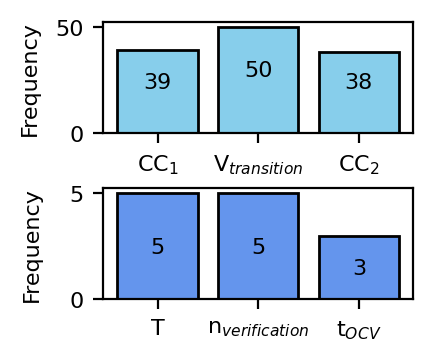

In [4]:
# Sample data for bar plot
categories = ['formation_charge_current_1', 'formation_cutoff_voltage_1', 'formation_charge_current_2']

labels = ['CC$_1$', 'V$_{transition}$', 'CC$_2$']
values = []
for cat in categories:
    num = np.count_nonzero(~np.isnan(df_param[cat].unique()))
    values.append(num)

# Create a bar plot
num_cols = 1
num_rows = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, 1.8), dpi = 200)
fig.subplots_adjust(hspace = .5, wspace=.4)

bars = axs[0].bar(labels, values, color='skyblue', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.0, yval//2, int(yval), va='bottom', ha='center', fontsize = 8)

labels = ['T', 'n$_{verification}$', 't$_{OCV}$']
categories = ['formation_temperature', 'formation_verification_repeat', 'ocv_time']
values = []
for cat in categories:
    num = np.count_nonzero(~np.isnan(df_param[cat].unique()))
    values.append(num)
bars = axs[1].bar(labels, values, color='cornflowerblue', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2.0, yval//2, int(yval), va='bottom', ha='center', fontsize = 8)

# Adding labels and title
axs[1].set_ylabel('Frequency', labelpad=10, fontsize=8)
axs[0].set_ylabel('Frequency', labelpad=5.5, fontsize=8)

axs[0].tick_params(axis='x', labelsize=8)
axs[0].tick_params(axis='y', labelsize=8)
axs[1].tick_params(axis='y', labelsize=8)
axs[1].tick_params(axis='x', labelsize=8)

# plt.savefig('Figs/param_freq.svg', transparent = True, bbox_inches='tight')